<a href="https://colab.research.google.com/github/YELORFI/FIN/blob/main/Automatic_ZC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import io
import requests
import pandas as pd
from datetime import datetime
def matu_resi(i,data):
  return int((pd.to_datetime(data["DE"][i], format='%d/%m/%Y')-pd.to_datetime(data["DV"][i], format='%d/%m/%Y')).days)
  
new = {'Maturité':["13 Semaines", "26 semaines", "52 Semaines", "52 S Actuariel", "2A", "5A", "10A",
"15A", "20A", "30A"],
        'En jours':[91,182,364,365,731,1826,3653,5479,7305,10507]}
newdata = pd.DataFrame(new)

k=2
datelist=[d.strftime('%d/%m/%Y') for d in pd.bdate_range(start="01/01/2021",end="01/31/2021")]
for date in datelist:
  try:
    url = "https://www.bkam.ma/export/blockcsv/2340/c3367fcefc5f524397748201aee5dab8/e1d6b9bbf87f86f8ba53e8518e882982?date="+str(date)+"&block=e1d6b9bbf87f86f8ba53e8518e882982"
    r = requests.get(url)
    if r.ok:
        df = r.content.decode('utf8')
        data = pd.read_csv(io.StringIO(df),sep=';',skiprows=2)
    data.columns=["DE","V","TMP","DV"]
    data=data.replace(",",".",regex=True).replace(" %","",regex=True)
    data=data[:-1]
    data=data.astype({'TMP': 'float'})
    L= []
    for i in range (0,len(data["DV"])):
      L.append(matu_resi(i,data))
    data.insert(3,"MR",L)
    data=data.sort_values(by='MR').reset_index(drop=True)
    T=[]; i=0;a=0
    for x in newdata['En jours']:
      while i <= len(data["MR"])-1:
        if x <= data['MR'][i]:
          if x == 365:
            a=(1+(((1+data['TMP'][i])**(data['MR'][i]/365)-1)*360/data['MR'][i])*364/360)**(365/364)-1
            break
          a=((data['TMP'][i]-data['TMP'][i-1])/(data['MR'][i]-data['MR'][i-1]))*(x-data['MR'][i-1])+data['TMP'][i-1]
          break
        i+=1 
      T.append(a)
    newdata.insert(k,"Taux" + str(k-1),T)
    k+=1
  except:
    pass
newdata.to_csv('jan21.csv',index=False)



In [ ]:


########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64
import pandas as pd
from datetime import date

datelist = pd.bdate_range(start="02/01/2022",end="02/28/2022")

for dates in datelist:
  headers = {
      # Request headers
      'Ocp-Apim-Subscription-Key': '7b2df1328a6845c19994fb25b4718737'}
  params = urllib.parse.urlencode({
      # Request parameters
      'dateCourbe': "02/01/2022" })
  try:
      con = http.client.HTTPSConnection('api.centralbankofmorocco.ma')
      con.request("GET", "/mo/Version1/api/CourbeBDT?%s" % params, "{body}", headers)
      response = con.getresponse()
      data=response.read()
      with open("my_file.txt", "wb") as f:
        f.write(data)
      con.close()
  except Exception as e:
      print("[Errno {0}] {1}".format(e.errno, e.strerror))
  dt=open('my_file.txt','r')


In [ ]:

from datetime import datetime
datelist=[d.strftime('%d/%m/%Y') for d in pd.bdate_range(start="01/01/2022",end="01/31/2022")]


print(datelist)
import pandas as pd
import glob

from datetime import date

def matu_resi(i,data):
  return int((pd.to_datetime(data["DE"][i], format='%d/%m/%Y')-pd.to_datetime(data["DV"][i], format='%d/%m/%Y')).days)

all_files = glob.glob("/*.csv")
data= pd.read_csv("test.csv",sep=';',skiprows=2)
data.columns=["DE","V","TMP","DV"]
data=data.replace(",",".",regex=True).replace(" %","",regex=True)
data=data[:-1]
data=data.astype({'TMP': 'float'})

L= []
for i in range (0,len(data["DV"])):
  L.append(matu_resi(i,data))
data.insert(4,"MR",L)
data=data.sort_values(by='MR').reset_index(drop=True)


new = {'Maturité':["13 Semaines", "26 semaines", "52 Semaines", "52 S Actuariel", "2A", "5A", "10A",
"15A", "20A", "30A"],
        'En jours':[91,182,364,365,731,1826,3653,5479,7305,10507]}

T=[]; i=0;a=0
newdata = pd.DataFrame(new)
for x in newdata['En jours']:
  while i <= len(data["MR"])-1:
    if x <= data['MR'][i]:
      if x == 365:
        a=(1+(((1+data['TMP'][i])**(data['MR'][i]/365)-1)*360/data['MR'][i])*364/360)**(365/364)-1
        break
      a=((data['TMP'][i]-data['TMP'][i-1])/(data['MR'][i]-data['MR'][i-1]))*(x-data['MR'][i-1])+data['TMP'][i-1]
      break
    i+=1
  T.append(a)
newdata.insert(2,"Taux",T)
newdata

,Maturité,En jours,Taux
0,13 Semaines,91,1.537971
1,26 semaines,182,1.559317
2,52 Semaines,364,1.633286
3,52 S Actuariel,365,1.709604
4,2A,731,1.818154
5,5A,1826,2.089643
6,10A,3653,2.410781
7,15A,5479,2.682639
8,20A,7305,2.861830
9,30A,10507,3.162397


In [ ]:
import pandas as pd
import glob
from datetime import date

def matu_resi(i,data):
  return int((pd.to_datetime(data["DE"][i], format='%d/%m/%Y')-pd.to_datetime(data["DV"][i], format='%d/%m/%Y')).days)
  
new = {'Maturité':["13 Semaines", "26 semaines", "52 Semaines", "52 S Actuariel", "2A", "5A", "10A",
"15A", "20A", "30A"],
        'En jours':[91,182,364,365,731,1826,3653,5479,7305,10507]}
newdata = pd.DataFrame(new)

all_files = glob.glob("*.csv")
k=2
for filename in all_files:
 
  data= pd.read_csv(filename,sep=';',skiprows=2)
  data=data.drop("Transaction",axis=1)
  data.columns=["DE","TMP","DV"]
  data=data.replace(",",".",regex=True).replace(" %","",regex=True)
  data=data[:-1]
  data=data.astype({'TMP': 'float'})
  
  L= []
  for i in range (0,len(data["DV"])):
    L.append(matu_resi(i,data))
  data.insert(3,"MR",L)
  data=data.sort_values(by='MR').reset_index(drop=True)
  T=[]; i=0;a=0
  for x in newdata['En jours']:
    while i <= len(data["MR"])-1:
      if x <= data['MR'][i]:
        if x == 365:
          a=(1+(((1+data['TMP'][i])**(data['MR'][i]/365)-1)*360/data['MR'][i])*364/360)**(365/364)-1
          break
        a=((data['TMP'][i]-data['TMP'][i-1])/(data['MR'][i]-data['MR'][i-1]))*(x-data['MR'][i-1])+data['TMP'][i-1]
        break
      i+=1 
    T.append(a)
  newdata.insert(k,"Taux" + str(k-1),T)
  k+=1
newdata

,Maturité,En jours,Taux1,Taux2
0,13 Semaines,91,1.559846,1.537971
1,26 semaines,182,1.572000,1.559317
2,52 Semaines,364,1.630923,1.633286
3,52 S Actuariel,365,2.309671,1.709604
4,2A,731,1.826714,1.818154
5,5A,1826,2.124504,2.089643
6,10A,3653,2.429353,2.410781
7,15A,5479,2.683967,2.682639
8,20A,7305,2.893500,2.861830
9,30A,10507,3.220004,3.162397


In [ ]:
#modélisation taux zero coupon
import pandas as pd
import matplotlib.pyplot as plt

data1= pd.read_csv("Courbe ZC.csv")

L= []
L.append(data1['Montant coupon'][0]/100)

for i in range (1,len(data1["Durée"])):
  S=0
  for j in range(0,i):
    S=S+data1['Montant coupon'][i]/(1+L[j])**(j+1)
  L.append(((100-S)/(100+data1['Montant coupon'][i]))**(-1/(i+1))-1)
data1.insert(3,"TZC",L)
data1.head()


,Unnamed: 0,Durée,Montant coupon,TZC
0,1 an,1,3.50,0.035000
1,2 ans,2,4.75,0.047801
2,3 ans,3,5.50,0.055662
3,4 ans,4,5.60,0.056595
4,5 ans,5,5.80,0.058745


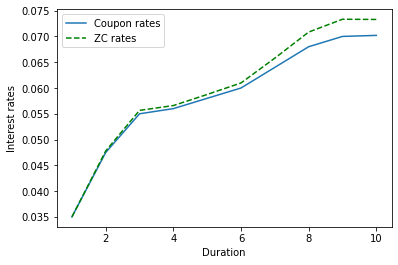

In [ ]:
x=data1["Durée"]
y=data1['Montant coupon']/100
z=data1['TZC']
plt.plot(x,y,label="Coupon rates")
plt.plot(x,z,color='green',linestyle='dashed', label="ZC rates")
plt.xlabel('Duration');plt.ylabel('Interest rates')
plt.legend()
plt.savefig('test.png')
#the difference is due to coupons given